In [1]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)


seed_everything(42)

df_train = pd.read_csv("../data/preprocessed/df_train001.csv")
df = pd.read_csv("../data/preprocessed/df.csv")

---

In [2]:
df_train.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.0,68.3,1.7,6.7,11.933,48.699342,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,11.933,48.699342,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,11.933,48.699342,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,11.933,48.699342,7.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,11.933,48.699342,-4.6


In [3]:
df_train['년'] = np.float64(df_train['일시'].str.split('-', expand=True)[0])
df_train['월'] = np.float64(df_train['일시'].str.split('-', expand=True)[1])
df_train['일'] = np.float64(df_train['일시'].str.split('-', expand=True)[2])

In [4]:
df['년'] = np.float64(df['일시'].str.split('-', expand=True)[0])
df['월'] = np.float64(df['일시'].str.split('-', expand=True)[1])
df['일'] = np.float64(df['일시'].str.split('-', expand=True)[2])

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
X = df_train.drop(columns=['일시','평균기온'], axis=1)
y = df_train['평균기온']

In [8]:
X = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.5, random_state=42 )

---

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(80),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(60),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(40),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(1)
])

In [16]:
model.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001), loss='mse')

In [17]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=2)

In [18]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, callbacks=early_stopping)

Epoch 1/40
360/360 [==============================] - 3s 4ms/step - loss: 106.8624 - val_loss: 23.7417
Epoch 2/40
360/360 [==============================] - 1s 3ms/step - loss: 8.8158 - val_loss: 0.5917
Epoch 3/40
360/360 [==============================] - 1s 3ms/step - loss: 4.4286 - val_loss: 0.4041
Epoch 4/40
360/360 [==============================] - 1s 3ms/step - loss: 3.9461 - val_loss: 0.6087
Epoch 5/40
360/360 [==============================] - 1s 3ms/step - loss: 4.0670 - val_loss: 0.3714
Epoch 6/40
360/360 [==============================] - 1s 3ms/step - loss: 3.5513 - val_loss: 0.6258
Epoch 7/40
360/360 [==============================] - 1s 3ms/step - loss: 3.9847 - val_loss: 0.3532
Epoch 8/40
360/360 [==============================] - 1s 3ms/step - loss: 3.6738 - val_loss: 0.3847


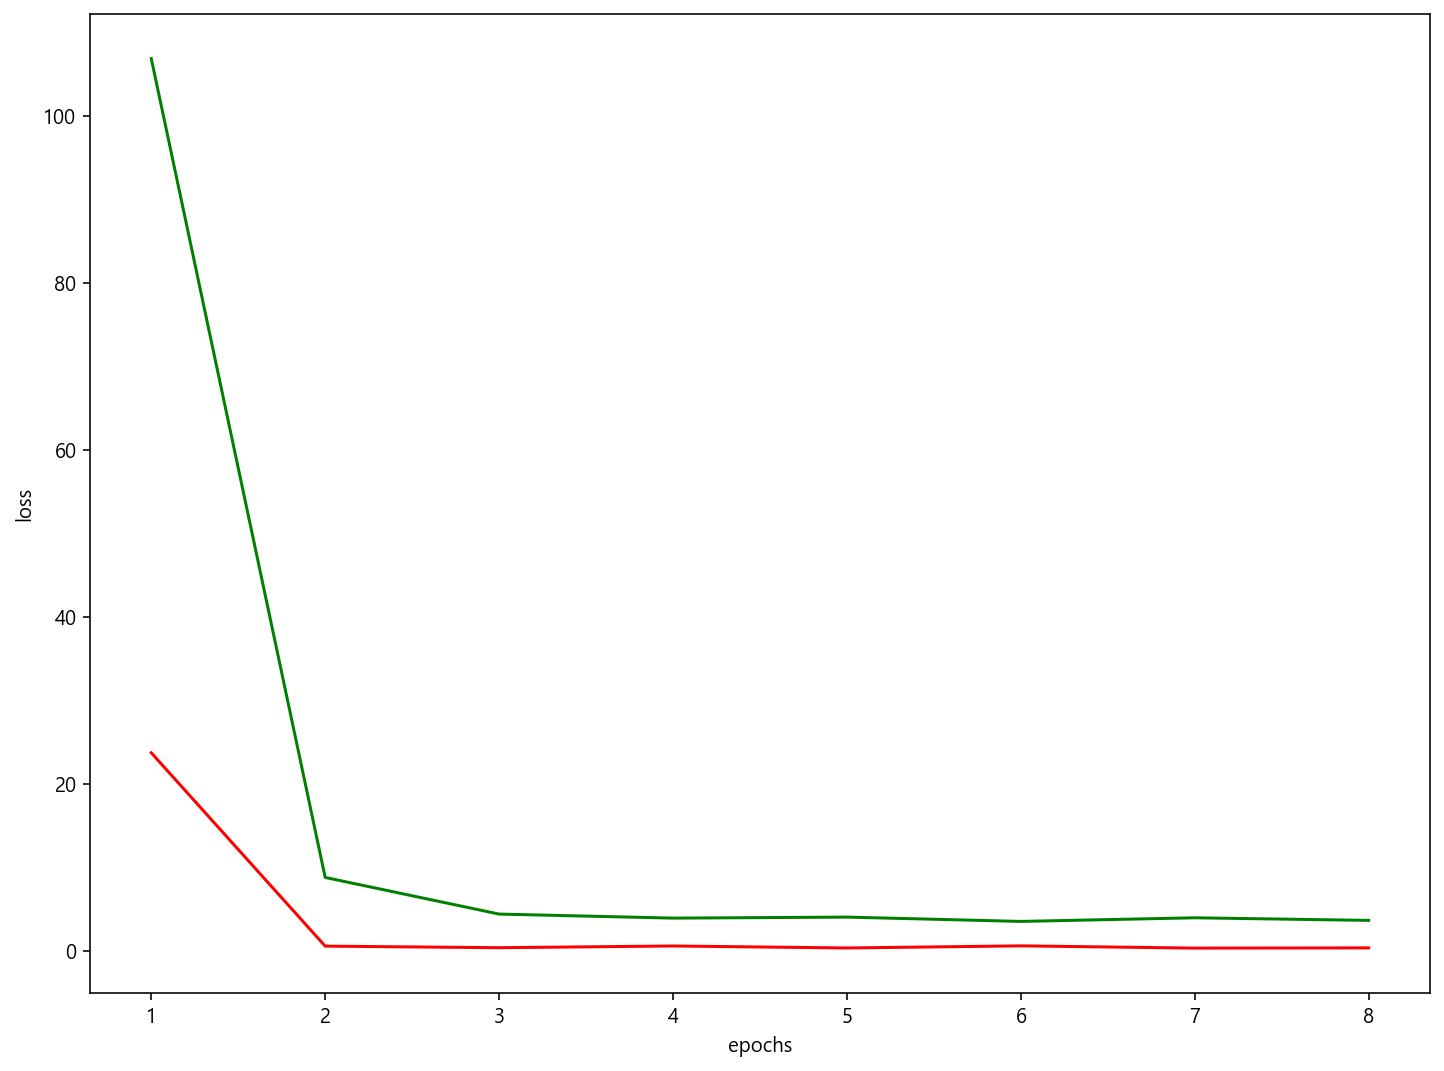

In [19]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['loss'], color='green',linestyle='-')
plt.plot(np.arange(1,len(history.history['val_loss'])+1), history.history['val_loss'], color='red',linestyle='-')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

---

In [20]:
sub_file = pd.read_csv("../data/original/sample_submission.csv")

In [21]:
df_x = scaler.transform(df.drop(columns=['일시'], axis=1))

In [22]:
sub_file['평균기온'] = model.predict(df_x)

12/12 [==============================] - 0s 1ms/step


<AxesSubplot:>

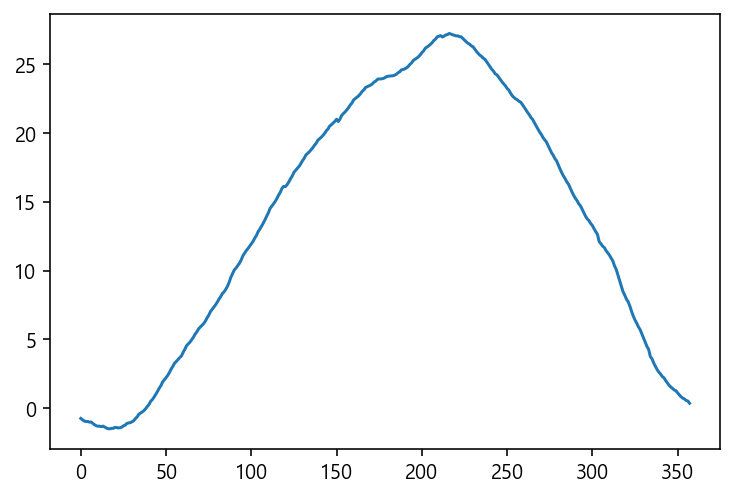

In [23]:
sub_file['평균기온'].plot()

In [24]:
sub_file.to_csv("../data/sub/032_df_tf_006.csv",
                index=False, encoding='utf-8')

---

In [25]:
import joblib

In [26]:
joblib.dump(model, '../model/tf_006.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\leaky_re_lu
......vars
...layers\leaky_re_lu_1
......vars
...layers\leaky_re_lu_2
......vars
...layers\leaky_re_lu_3
......vars
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
......

['../model/tf_006.pkl']

In [27]:
loaded_model = joblib.load('../model/tf_006.pkl')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-12-24 19:41:14         5808
metadata.json                                  2023-12-24 19:41:14           64
variables.h5                                   2023-12-24 19:41:14       264960
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
........